### **Task 4- Train and Evaluation**

#### **Project Path and imports**

In [1]:
import sys
from pathlib import Path
from src.train.pipeline import run_pipeline
from src.ann.config import ANNConfig
from src.pso.config import PSOConfig

# project root = parent of "notebooks"
PROJECT_ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path.cwd().parents[0]

# Make sure root is on sys.path so we can import train, pso, etc.
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

PROJECT_ROOT


WindowsPath('C:/university/BC/F21BC-Coursework/src/notebooks')

#### **ANN Configs**

In [2]:
# ANN CONFIG — baseline
ann_config = ANNConfig(
    input_dim=8,   # 8 features in dataset
    hidden_layers=[
        {"units": 8,  "activation": "relu"},
    ],
    output_dim=1,
)


#### **PSO Configs**

In [5]:
pso_config = PSOConfig(
    swarm_size=80,          # Large swarm → better global exploration
    iterations=3000,         # Enough time for convergence
    alpha=0.7,              # Balanced inertia
    beta=1.5,               # Cognitive pull (personal best)
    gamma=1.5,              # Social pull (informants)
    delta=0.0,              # Avoids unstable attraction to global best
    e=1.0,                  # Step size multiplier
    bounds=(-10.0, 10.0),   # Larger weight search space → better minima
    v_clamp=(-3.0, 3.0),    # Prevents overshooting while maintaining velocity
    k_informants=3,         # Light, local collaboration
    topology="ring",        # BEST topology for ANN optimisation
    ring_radius=1,          # Small neighbourhood → stable convergence
    boundary_mode="reflect",# Avoid particle dead zones (better exploration)
    rewire_every=None,      # Stable topology
    seed=None,              # Let PSO randomness help explore more
    minimize=True           # We minimise MAE
)

#### **Train and Test evaluation**


======== EXPERIMENTAL PIPELINE (1 RUNS) ========

 Run 1/1
[PSO] iter 1/3000 gbest=21.185791
[PSO] iter 301/3000 gbest=6.646762
[PSO] iter 601/3000 gbest=6.392077
[PSO] iter 901/3000 gbest=6.108590
[PSO] iter 1201/3000 gbest=5.979421
[PSO] iter 1501/3000 gbest=5.906545
[PSO] iter 1801/3000 gbest=5.845964
[PSO] iter 2101/3000 gbest=5.786482
[PSO] iter 2401/3000 gbest=5.742724
[PSO] iter 2701/3000 gbest=5.638827
[PSO] iter 3000/3000 gbest=5.497551
   gBest=5.4976 | Train MAE=5.4976 | Test MAE=5.6176

======== EXPERIMENT SUMMARY (Mean ± SD) ========
Number of Runs:   1
ANN Architecture: 8(relu)
PSO Config:       swarm=80, iter=3000, αlpha=0.7, beta=1.5, gamma=1.5, bounds=(-10.0, 10.0)
Average gBest:    5.4976 ± 0.0000
Average Train MAE:5.4976 ± 0.0000
Average Test MAE: 5.6176 ± 0.0000


C:\university\BC\F21BC-Coursework\src\train\pipeline.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.94])


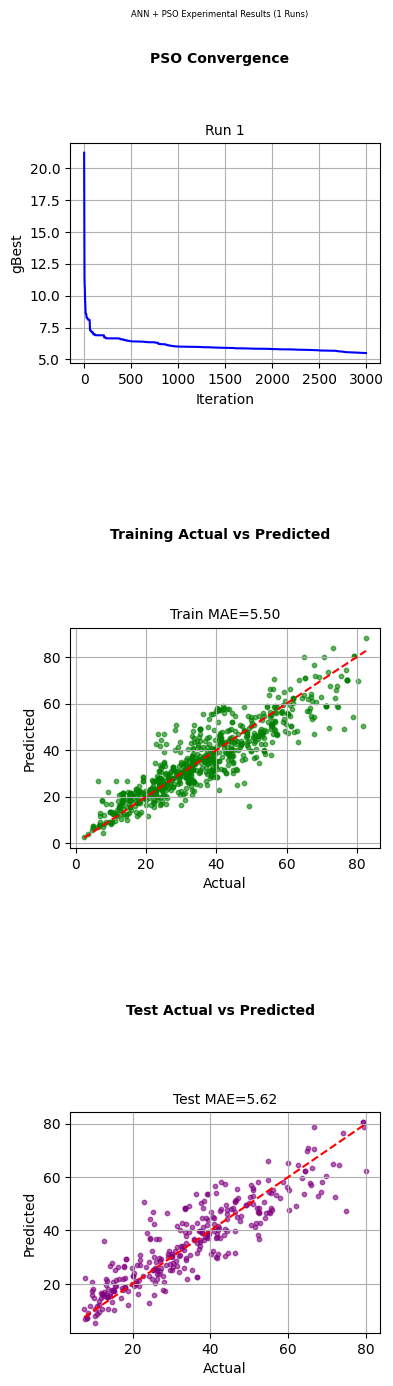

visualization completed.


In [6]:
# Run training pipeline
run_pipeline(ann_config, pso_config,runs=1)

#### **Results & Discussion**


This is our initial experiment used an ANN with two hidden layers which contains 16, 8 neurons with RELU activation and PSO configuration of 40 particles and 400 iterations. The model achieved a training MAE(mean absolute error) of 6.6270 and testing MAE 7.2031 indicating good generalisation with minimal overfitting. The PSO convergence curve showed a steep improvement in the early iterations followed by gradual stabilisation, suggesting effective exploration and convergence toward optimal network parameters. The small gap between training and testing MAE confirms that the network successfully captured the non-linear relationships within the concrete strength dataset. Overall, this result establishes a strong baseline, demonstrating that PSO can efficiently optimise ANN weights and biases for regression problems without gradient-based learning, while providing a stable and interpretable convergence pattern.